In [162]:
from for_importing import X_cleaned
from binning_to_import import y_bins

In [163]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from sklearn.model_selection import train_test_split


In [164]:
class Model(nn.Module):
      def __init__(self,input_size,hidden_size):
          super(Model,self).__init__()
          self.fc1=nn.Linear(input_size,hidden_size)
          self.fc2 = nn.Linear(hidden_size, 1)
          self.activation=nn.Sigmoid()

      def forward(self, x):
        x = self.activation(self.fc1(x))
        return self.fc2(x)

      
      


In [165]:
# y=y_bins['cluster'].astype(int)
# nfeatures=8
# nhid = 100
# model = Model(nfeatures,nhid)

In [166]:
X=X_cleaned[['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst',
       'PctPopUnderPov', 'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup']].to_numpy()
y=y_bins['cluster'].astype(int).to_numpy()
xtr,xts,ytr,yts=train_test_split(X,y,test_size=0.2)
nfeatures=8
nhid = 100
model = Model(nfeatures,nhid)

In [167]:
# xtr,xts,ytr,yts=train_test_split(X_cleaned,y,test_size=0.2,random_state=22)
# xtr=xtr[['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst',
#        'PctPopUnderPov', 'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup']].to_numpy()
# xts=xts[['racepctblack', 'racePctWhite', 'pctWInvInc', 'pctWPubAsst',
#        'PctPopUnderPov', 'TotalPctDiv', 'PctKids2Par', 'PctPersOwnOccup']].to_numpy()
# ytr=ytr.to_numpy()
# yts=yts.to_numpy()

Xtr_torch =torch.tensor(xtr, dtype=torch.float32)
Xts_torch = torch.tensor(xts,dtype=torch.float32)
ytr_torch = torch.tensor(ytr,dtype=torch.int32)
yts_torch = torch.tensor(yts, dtype=torch.int32)

train_dataset = TensorDataset(Xtr_torch,ytr_torch)
test_dataset = TensorDataset(Xts_torch,yts_torch)

batch_size = 100
train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)



In [168]:


pos_weight = torch.tensor([4.0])  # Adjust based on your actual imbalance
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.Adam(model.parameters(),lr=.001)

In [169]:
# Lists to store training and testing accuracy for each epoch
train_accuracy_history = []
test_accuracy_history = []
loss_history = []

# Training loop
epochs = 100

for epoch in range(epochs):
    # Train over epoch
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    for data, target in train_loader:
        target = target.float().unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        predicted = (torch.sigmoid(outputs) >= 0.5).float()
        correct += (predicted == target).sum().item()

        total += target.size(0)

    avg_loss = total_loss / len(train_loader)
    train_accuracy = correct *100 / total
    loss_history.append(avg_loss)
    train_accuracy_history.append(train_accuracy)

    # Test over epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            target = target.float().unsqueeze(1)
            outputs = model(data)
            predicted = (torch.sigmoid(outputs) >= 0.5).float()
            correct += (predicted == target).sum().item()
            total += target.size(0)

    test_accuracy = correct / total
    test_accuracy_history.append(test_accuracy)

    # Print accuracy
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}, '
              f'Training Accuracy: {round(train_accuracy,2)}%, Test Accuracy: {round(test_accuracy*100,2)}%')


Epoch [5/100], Loss: 1.0405, Training Accuracy: 81.0%, Test Accuracy: 86.22%
Epoch [10/100], Loss: 0.9088, Training Accuracy: 80.5%, Test Accuracy: 78.7%
Epoch [15/100], Loss: 0.7775, Training Accuracy: 82.7%, Test Accuracy: 79.7%
Epoch [20/100], Loss: 0.7054, Training Accuracy: 82.26%, Test Accuracy: 80.2%
Epoch [25/100], Loss: 0.6747, Training Accuracy: 82.63%, Test Accuracy: 80.45%
Epoch [30/100], Loss: 0.6606, Training Accuracy: 82.63%, Test Accuracy: 79.95%
Epoch [35/100], Loss: 0.6551, Training Accuracy: 82.76%, Test Accuracy: 80.2%
Epoch [40/100], Loss: 0.6514, Training Accuracy: 82.82%, Test Accuracy: 80.95%
Epoch [45/100], Loss: 0.6491, Training Accuracy: 82.57%, Test Accuracy: 80.2%
Epoch [50/100], Loss: 0.6465, Training Accuracy: 82.57%, Test Accuracy: 80.7%
Epoch [55/100], Loss: 0.6456, Training Accuracy: 82.7%, Test Accuracy: 80.7%
Epoch [60/100], Loss: 0.6436, Training Accuracy: 82.32%, Test Accuracy: 81.95%
Epoch [65/100], Loss: 0.6439, Training Accuracy: 82.88%, Test Ac

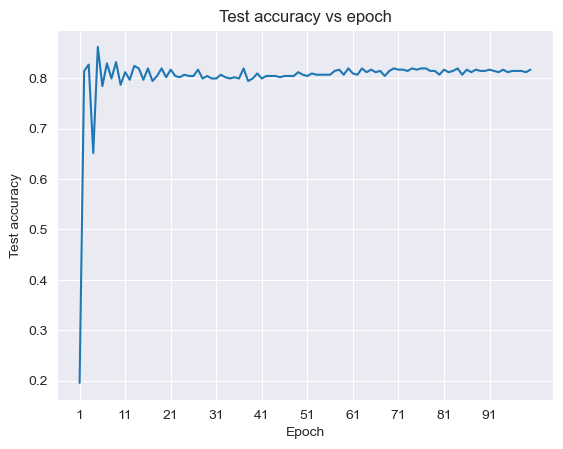

In [170]:

plt.plot(range(1,101),test_accuracy_history)
plt.title('Test accuracy vs epoch')
plt.xticks(range(1,101,10))
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.show()

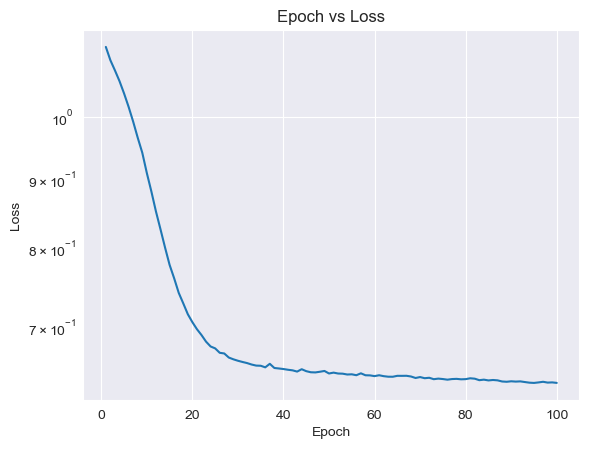

In [171]:

plt.semilogy(range(1,101),loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.show()

In [172]:
rates = [1e-4, 1e-3, 1e-2]
test_acc_lr = []
loss_hist_lr = []

for lr in rates:

    model = Model(nfeatures, nhid)


    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
    optimizer = optim.Adam(model.parameters(), lr=lr)


    # Lists to store training and testing accuracy for each epoch
    train_accuracy_history = []
    test_accuracy_history = []
    loss_history = []

    # Number of epochs
    epochs = 100

    # Training loop
    for epoch in range(epochs):
      # Train over epoch
      model.train()
      total_loss = 0
      correct = 0
      total = 0

      for data, target in train_loader:
          target = target.float().unsqueeze(1)
          optimizer.zero_grad()
          outputs = model(data)
          loss = criterion(outputs, target)
          loss.backward()
          optimizer.step()

          total_loss += loss.item()
          predicted = (torch.sigmoid(outputs) >= 0.5).float()
          correct += (predicted == target).sum().item()

          total += target.size(0)

      avg_loss = total_loss / len(train_loader)
      train_accuracy = correct / total
      loss_history.append(avg_loss)
      train_accuracy_history.append(train_accuracy)

      # Test over epoch
      model.eval()
      correct = 0
      total = 0
      with torch.no_grad():
          for data, target in test_loader:
              target = target.float().unsqueeze(1)
              outputs = model(data)
              predicted = (torch.sigmoid(outputs) >= 0.5).float()
              correct += (predicted == target).sum().item()
              total += target.size(0)

      test_accuracy = correct / total
      test_accuracy_history.append(test_accuracy)

    test_acc_lr.append(test_accuracy_history)
    loss_hist_lr.append(loss_history)


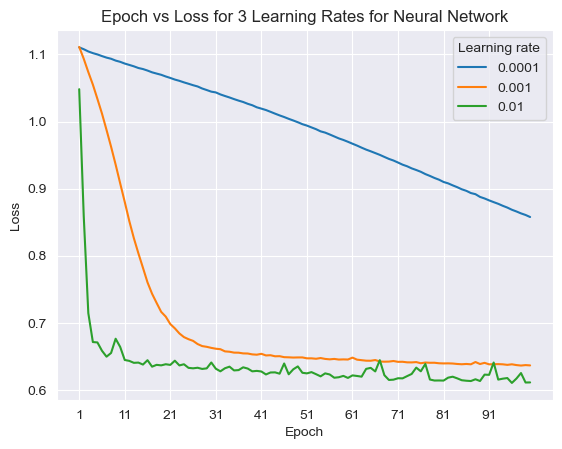

In [173]:

for lr in range(3):
  plt.plot(range(1,101),loss_hist_lr[lr],label=rates[lr])

plt.legend(title='Learning rate')
plt.xlabel('Epoch')
plt.xticks(range(1,101,10))
plt.ylabel('Loss')
plt.title('Epoch vs Loss for 3 Learning Rates for Neural Network')
plt.show()